In [1]:
# Import required libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Define a regex pattern to match log entries in the format you provided
log_pattern = r'(?P<timestamp>\S+)\s+(?P<session>\S+)\s+(?P<src_ip>\S+)\s+(?P<src_port>\S+)\s+(?P<dst_ip>\S+)\s+(?P<dst_port>\S+)\s+(?P<protocol>\d+)\s+(?P<method>\S+)\s+(?P<host>\S+)\s+(?P<url>\S+)\s+(?P<referrer>\S+)\s+(?P<user_agent>.+?)\s+(?P<bytes_sent>\d+)\s+(?P<bytes_received>\d+)\s+(?P<status_code>\d+)\s+(?P<status_msg>\S+)\s+(?P<remaining>.+)'

# Function to parse logs from a .log file
def parse_log_file(log_file):
    logs = []
    with open(log_file, 'r') as file:
        for line in file:
            match = re.match(log_pattern, line)
            if match:
                logs.append(match.groupdict())
    return pd.DataFrame(logs)

In [16]:
# Read and parse the log file
log_file_path = 'http.log'  # Replace with the actual log file path
df_logs = parse_log_file(log_file_path)

In [17]:
# Convert timestamp to float and status_code to integer
df_logs['timestamp'] = pd.to_numeric(df_logs['timestamp'], errors='coerce')
df_logs['status_code'] = pd.to_numeric(df_logs['status_code'], errors='coerce')

# Convert 'timestamp' to datetime
df_logs['datetime'] = pd.to_datetime(df_logs['timestamp'], unit='s')

# Display the first few rows of the parsed DataFrame
print(df_logs.head())

      timestamp             session          src_ip src_port           dst_ip  \
0  1.331901e+09  CHEt7z3AzG4gyCNgci  192.168.202.79    50465  192.168.229.251   
1  1.331901e+09  CKnDAp2ohlvN6rpiXl  192.168.202.79    50467  192.168.229.251   
2  1.331901e+09  CNTrjn42F3LB58MZH6  192.168.202.79    50469  192.168.229.251   
3  1.331901e+09  C1D7mK1PlzKEnEyG03  192.168.202.79    50471  192.168.229.251   
4  1.331901e+09   CGF1bVMyl9ALKI32l  192.168.202.79    50473  192.168.229.251   

  dst_port protocol method             host             url referrer  \
0       80        1   HEAD  192.168.229.251  /DEASLog02.nsf        -   
1       80        1   HEAD  192.168.229.251  /DEASLog03.nsf        -   
2       80        1   HEAD  192.168.229.251  /DEASLog04.nsf        -   
3       80        1   HEAD  192.168.229.251  /DEASLog05.nsf        -   
4       80        1   HEAD  192.168.229.251    /DEASLog.nsf        -   

                                          user_agent bytes_sent  \
0  Mozilla/5.

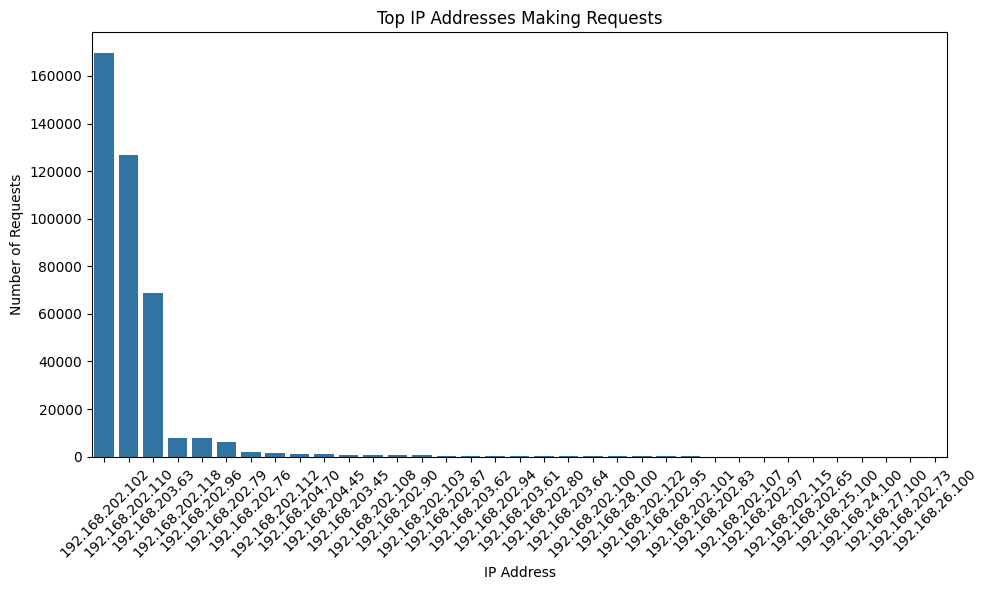

In [18]:
# Group by src_ip and count the number of requests
ip_counts = df_logs['src_ip'].value_counts().reset_index()
ip_counts.columns = ['src_ip', 'request_count']

# Plot top IP addresses
plt.figure(figsize=(10, 6))
sns.barplot(data=ip_counts, x='src_ip', y='request_count')
plt.title('Top IP Addresses Making Requests')
plt.xlabel('IP Address')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-19-33ba44d3719c>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


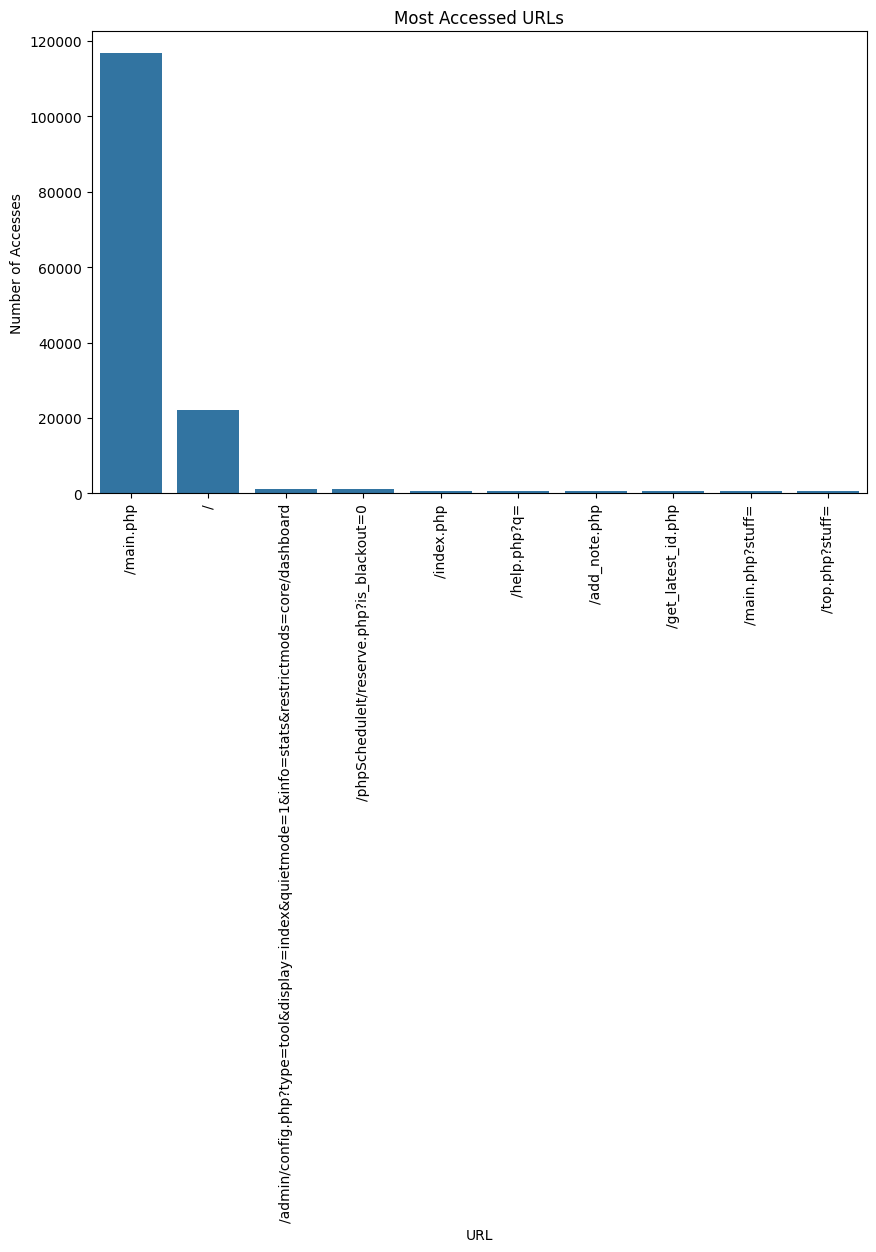

In [19]:
# Group by URL and count the number of accesses
url_counts = df_logs['url'].value_counts().reset_index()
url_counts.columns = ['url', 'access_count']

# Plot most accessed URLs
plt.figure(figsize=(10, 6))
sns.barplot(data=url_counts.head(10), x='url', y='access_count')
plt.title('Most Accessed URLs')
plt.xlabel('URL')
plt.ylabel('Number of Accesses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

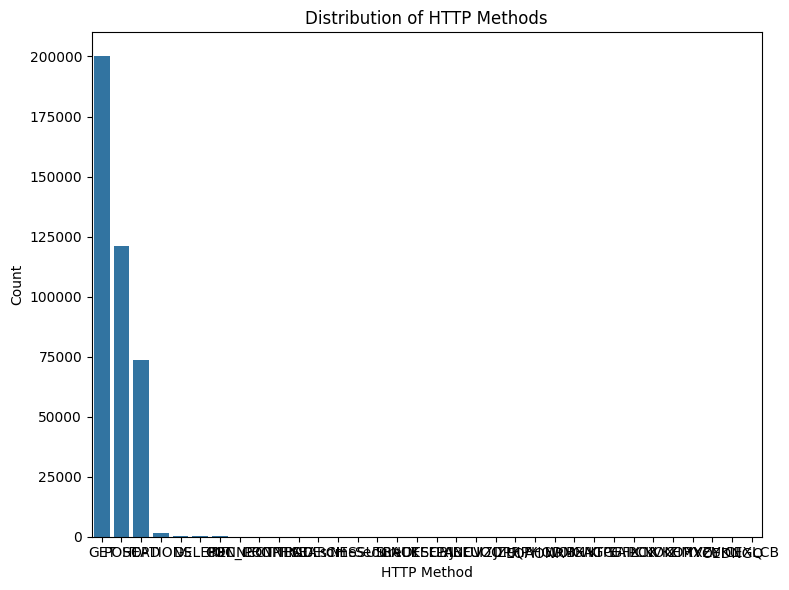

In [20]:
# Group by HTTP method and count occurrences
method_counts = df_logs['method'].value_counts().reset_index()
method_counts.columns = ['method', 'count']

# Plot HTTP methods
plt.figure(figsize=(8, 6))
sns.barplot(data=method_counts, x='method', y='count')
plt.title('Distribution of HTTP Methods')
plt.xlabel('HTTP Method')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

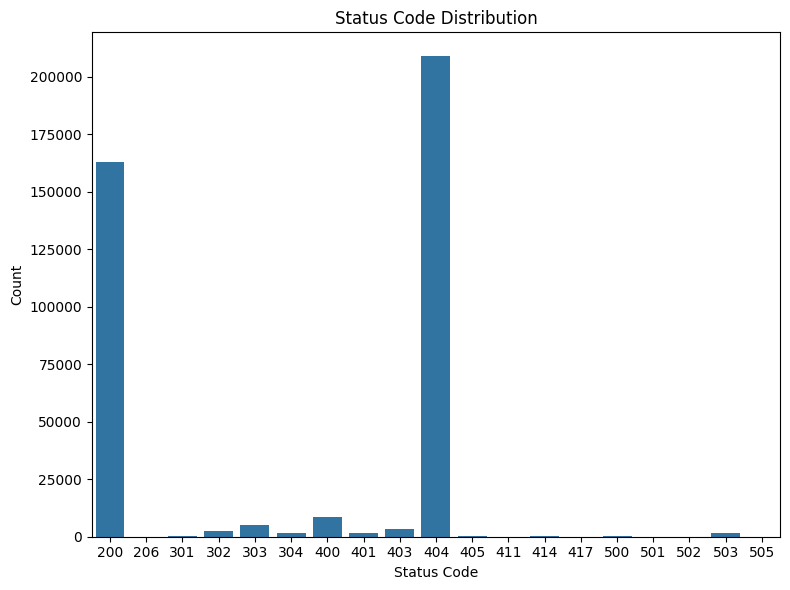

In [21]:
# Group by status code and count occurrences
status_counts = df_logs['status_code'].value_counts().reset_index()
status_counts.columns = ['status_code', 'count']

# Plot status codes
plt.figure(figsize=(8, 6))
sns.barplot(data=status_counts, x='status_code', y='count')
plt.title('Status Code Distribution')
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-22-ba406820218f>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  traffic_by_time = df_logs.resample('T').size()


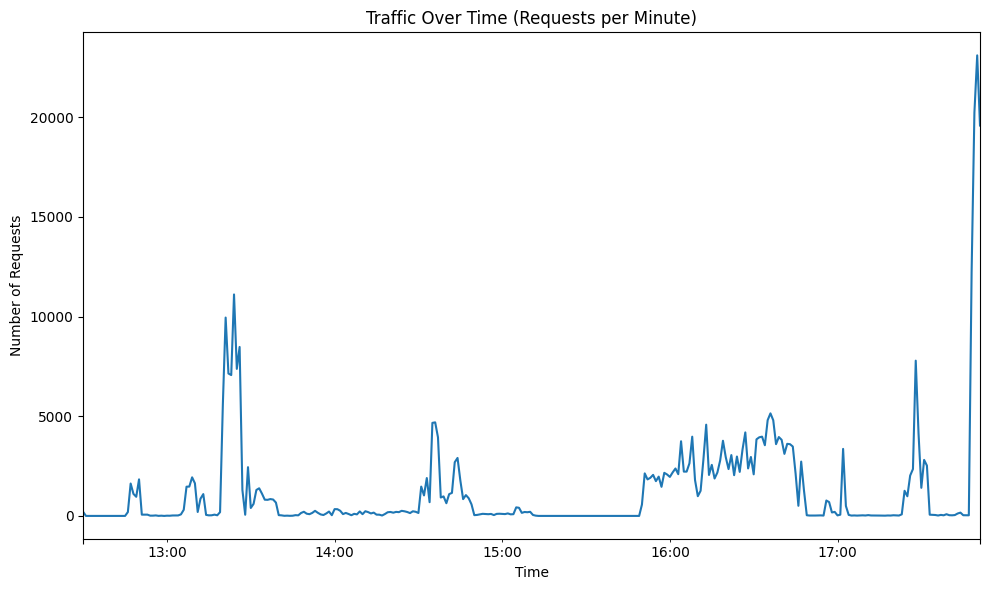

In [22]:
# Resample by minute and count requests
df_logs.set_index('datetime', inplace=True)
traffic_by_time = df_logs.resample('T').size()

# Plot traffic over time
plt.figure(figsize=(10, 6))
traffic_by_time.plot()
plt.title('Traffic Over Time (Requests per Minute)')
plt.xlabel('Time')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.show()